In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Project-X-Lip-Reading

/content/drive/.shortcut-targets-by-id/1_r1ryXDRaCdsR0PFGkkxkbeXFIv5d38H/Project-X-Lip-Reading


In [ ]:
import pickle
import time
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, Activation, MaxPool3D, Reshape, Bidirectional, LSTM, Dropout, Flatten, Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras.losses import CategoricalCrossentropy

In [ ]:
with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/words/train/X_train.pkl', 'rb') as f:
    X_train = pickle.load(f)

with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/words/train/y_train.pkl', 'rb') as f:
    y_train = pickle.load(f)

with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/words/test/X_test.pkl', 'rb') as f:
    X_test = pickle.load(f)

with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/words/test/y_test.pkl', 'rb') as f:
    y_test = pickle.load(f)

with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/words/val/X_val.pkl', 'rb') as f:
    X_val = pickle.load(f)

with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/words/val/y_val.pkl', 'rb') as f:
    y_val = pickle.load(f)


In [ ]:
def create_model_l2(l2_rate):
    model = Sequential()

    # Convolutional layers
    model.add(Conv3D(32, (3, 3, 3), strides=1, input_shape=(28, 100, 100, 1), activation='relu', padding='valid', kernel_regularizer=l2(l2_rate)))
    model.add(MaxPool3D(pool_size=(2, 2, 2), strides=2))

    model.add(Conv3D(64, (3, 3, 3), activation='relu', strides=1, kernel_regularizer=l2(l2_rate)))
    model.add(MaxPool3D(pool_size=(2, 2, 2), strides=2))

    model.add(Conv3D(128, (3, 3, 3), activation='relu', strides=1, kernel_regularizer=l2(l2_rate)))
    model.add(MaxPool3D(pool_size=(2, 2, 2), strides=2))

    model.add(Reshape((128, 1*10*10)))

    # LSTM layer
    model.add(LSTM(32, return_sequences=True, kernel_regularizer=l2(l2_rate)))
    model.add(Dropout(0.5))

    model.add(Flatten())


    model.add(Dense(2048, activation='relu', kernel_regularizer=l2(l2_rate)))
    model.add(Dropout(0.3))
    model.add(Dense(1024, activation='relu', kernel_regularizer=l2(l2_rate)))
    model.add(Dropout(0.3))

    model.add(Dense(10, activation='softmax'))

    return model


In [ ]:
l2_rate = 0.001
model = create_model_l2(l2_rate)

model.compile(loss=CategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])

model.summary()


t1 = time.time()
plot = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=25, batch_size=8)
t2 = time.time()
print(f"Training time : {t2 - t1} sec")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv3d (Conv3D)                      │ (None, 20, 98, 98, 32)      │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d (MaxPooling3D)         │ (None, 10, 49, 49, 32)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv3d_1 (Conv3D)                    │ (None, 8, 47, 47, 64)       │          55,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d_1 (MaxPooling3D)       │ (None, 4, 23, 23, 64)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv3d_2 (Conv3D)                    │ (None, 2, 21, 21, 128)      │         221,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d_2 (MaxPooling3D)       │ (None, 1, 10, 10, 128)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 128, 100)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 128, 32)             │          17,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128, 32)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2048)                │       8,390,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,793,674 (41.17 MB)

 Trainable params: 10,793,674 (41.17 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 132ms/step - accuracy: 0.2612 - loss: 5.5974 - val_accuracy: 0.2857 - val_loss: 3.9790
Epoch 2/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.3035 - loss: 3.7459 - val_accuracy: 0.3571 - val_loss: 3.0956
Epoch 3/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - accuracy: 0.3972 - loss: 2.9052 - val_accuracy: 0.3571 - val_loss: 2.4995
Epoch 4/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.4034 - loss: 2.4522 - val_accuracy: 0.3571 - val_loss: 2.1985
Epoch 5/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.3576 - loss: 2.1718 - val_accuracy: 0.5000 - val_loss: 1.9254
Epoch 6/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.3089 - loss: 1.9311 - val_accuracy: 0.5000 - val_loss: 1.7516
Epoch 7/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.4205 - loss: 1.7819 - val_accuracy: 0.5000 - val_loss: 1.6261
Epoch 8/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.3596 - loss: 1.6330 - val_accuracy: 0.5000 -

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"L2 rate: {l2_rate} - Test loss: {test_loss}, Test accuracy: {test_accuracy}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.9231 - loss: 0.5692
L2 rate: 0.001 - Test loss: 0.5692344903945923, Test accuracy: 0.9230769276618958


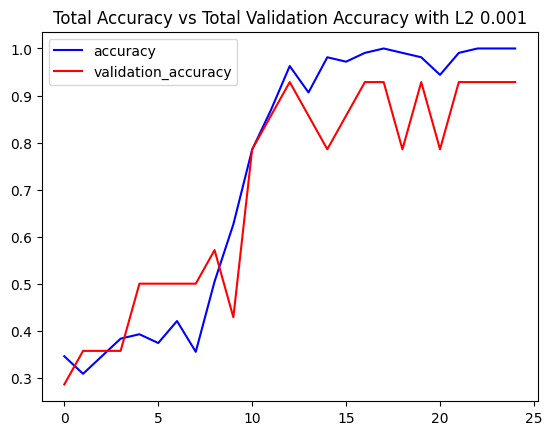

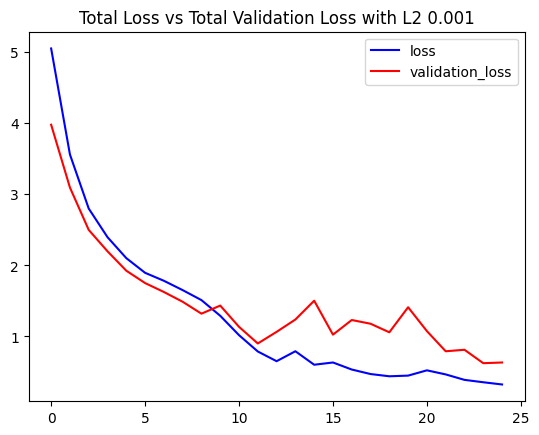

In [ ]:
# Plot accuracy
plt.plot(plot.history['accuracy'], 'blue', label='accuracy')
plt.plot(plot.history['val_accuracy'], 'red', label='validation_accuracy')
plt.title(f"Total Accuracy vs Total Validation Accuracy with L2 {l2_rate}")
plt.legend()
plt.show()

# Plot loss
plt.plot(plot.history['loss'], 'blue', label='loss')
plt.plot(plot.history['val_loss'], 'red', label='validation_loss')
plt.title(f"Total Loss vs Total Validation Loss with L2 {l2_rate}")
plt.legend()
plt.show()


In [ ]:
# from tensorflow.keras.regularizers import l1
# import numpy as np

# l1_rates = [0.0001, 0.001, 0.01, 0.1]

# for l1_rate in l1_rates:
#     print(f"Testing L1 regularization rate: {l1_rate}")
#     model = create_model_l1(l1_rate)
#     model.compile(loss=CategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])

#     t1 = time.time()
#     plot = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=25, batch_size=8, verbose=1)
#     t2 = time.time()
#     print(f"Training time : {t2 - t1} sec")

#     test_loss, test_accuracy = model.evaluate(X_test, y_test)
#     print(f"L1 rate: {l1_rate} - Test loss: {test_loss}, Test accuracy: {test_accuracy}")

#     plt.plot(plot.history['accuracy'], label=f'accuracy (L1={l1_rate})')
#     plt.plot(plot.history['val_accuracy'], label=f'validation_accuracy (L1={l1_rate})')
#     plt.title(f"Accuracy vs Validation Accuracy with L1 {l1_rate}")
#     plt.legend()
#     plt.show()

#     plt.plot(plot.history['loss'], label=f'loss (L1={l1_rate})')
#     plt.plot(plot.history['val_loss'], label=f'validation_loss (L1={l1_rate})')
#     plt.title(f"Loss vs Validation Loss with L1 {l1_rate}")
#     plt.legend()
#     plt.show()
